In [2]:
%config IPCompleter.greedy=True

### 1. Importing libraries

In [1]:
import os
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn 

### 1.1 Importing dataset

In [3]:
emotions = pd.read_csv("C:/Users/nyein/CZ4041/emotions/emotions.csv")

### 1.2 Simple EDA

In [4]:
print("Shape of dataset: {}".format(emotions.shape))
emotions.head(5)

Shape of dataset: (593, 78)


,Mean_Acc1298_Mean_Mem40_Centroid,Mean_Acc1298_Mean_Mem40_Rolloff,Mean_Acc1298_Mean_Mem40_Flux,Mean_Acc1298_Mean_Mem40_MFCC_0,Mean_Acc1298_Mean_Mem40_MFCC_1,Mean_Acc1298_Mean_Mem40_MFCC_2,Mean_Acc1298_Mean_Mem40_MFCC_3,Mean_Acc1298_Mean_Mem40_MFCC_4,Mean_Acc1298_Mean_Mem40_MFCC_5,Mean_Acc1298_Mean_Mem40_MFCC_6,...,BH_HighLowRatio,BHSUM1,BHSUM2,BHSUM3,amazed-suprised,happy-pleased,relaxing-calm,quiet-still,sad-lonely,angry-aggresive
0,0.034741,0.089665,0.091225,-73.302422,6.215179,0.615074,2.037160,0.804065,1.301409,0.558576,...,2,0.245457,0.105065,0.405399,0,1,1,0,0,0
1,0.081374,0.272747,0.085733,-62.584437,3.183163,-0.218145,0.163038,0.620251,0.458514,0.041426,...,2,0.343547,0.276366,0.710924,1,0,0,0,0,1
2,0.110545,0.273567,0.084410,-65.235325,2.794964,0.639047,1.281297,0.757896,0.489412,0.627636,...,3,0.188693,0.045941,0.457372,0,1,0,0,0,1
3,0.042481,0.199281,0.093447,-80.305152,5.824409,0.648848,1.754870,1.495532,0.739909,0.809644,...,2,0.102839,0.241934,0.351009,0,0,1,0,0,0
4,0.074550,0.140880,0.079789,-93.697749,5.543229,1.064262,0.899152,0.890336,0.702328,0.490685,...,2,0.195196,0.310801,0.683817,0,0,0,1,0,0


#### 1.2.1 Checking for missing values

In [5]:
pd.set_option('display.max_rows', 5)     #set max options to ensure all the rows are displayed
missing_data = emotions.isnull().sum()
print(missing_data)                       #no missing data is found

Mean_Acc1298_Mean_Mem40_Centroid    0
 Mean_Acc1298_Mean_Mem40_Rolloff    0
                                   ..
 sad-lonely                         0
 angry-aggresive                    0
Length: 78, dtype: int64


#### 1.2.2 Checking number of observations under each label

In [6]:
# Extracting the target labels
target_labels = list(emotions.columns.values)
target_labels = target_labels[-6:]
print(target_labels)

[' amazed-suprised', ' happy-pleased', ' relaxing-calm', ' quiet-still', ' sad-lonely', ' angry-aggresive']


In [54]:
# number of observations under each category
pd.set_option('display.max_rows', 6)
total_num = []
for target_label in target_labels:
    total_num.append((target_label, emotions[target_label].sum()))
num_observations = pd.DataFrame(total_num, columns=['Target Labels', 'Number of observations'])
num_observations

,Target Labels,Number of observations
0,amazed-suprised,173
1,happy-pleased,166
2,relaxing-calm,264
3,quiet-still,148
4,sad-lonely,168
5,angry-aggresive,189


##### 1.2.2.1 Plotting the result

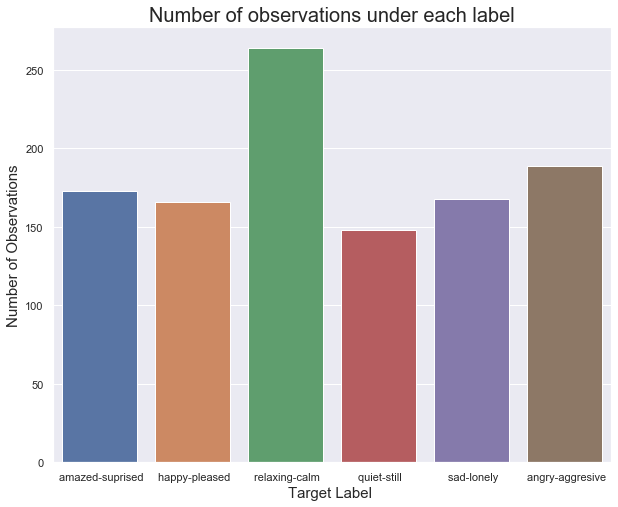

In [44]:
seaborn.set(font_scale = 1)
plt.figure(figsize=(10,8))

seaborn.barplot(target_labels, num_observations["Number of observations"])

plt.title("Number of observations under each label", fontsize=20)
plt.ylabel('Number of Observations',fontsize = 15)
plt.xlabel('Target Label ',fontsize = 15)


plt.show()

#### 1.2.3 Checking for Observations with more than 1 label

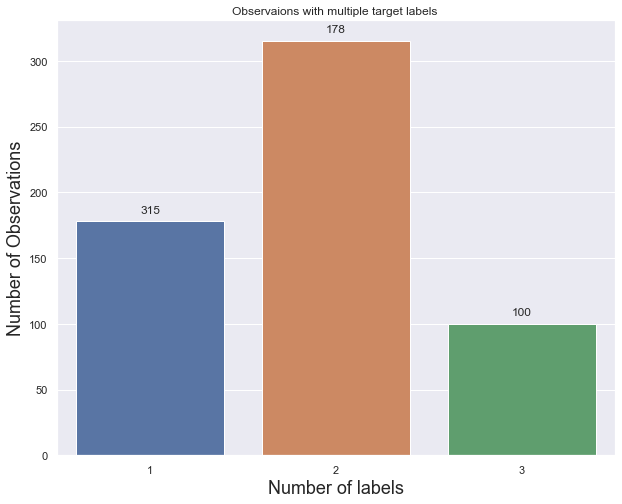

In [96]:
# emotions.iloc[:,-6:].sum().values
seaborn.set(font_scale = 1)
plt.figure(figsize=(10,8))

rowSums = emotions.iloc[:,-6:].sum(axis=1)
multiLabel_counts = rowSums.value_counts()
multiLabel_counts = multiLabel_counts.iloc[0:]



ax = seaborn.barplot(multiLabel_counts.index, multiLabel_counts.values)

plt.title("Observaions with multiple target labels ")
plt.ylabel('Number of Observations', fontsize=18)
plt.xlabel('Number of labels', fontsize=18)
#adding the text labels
rects = ax.patches
labels = multiLabel_counts.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')


plt.show()


Based on the plot, 315 observations are assigned 1 label, 178 labels are assigned 2 labels and 100 labels are assigned 3 labels.

### 1.3Data preprocessing

#### 1.3.1 Checking Min/Max values